# PD Data Exploration
Exploring the data of Programmers,Developers on April 5, 2018 and 60 days prior.

## Introduction
**[Programmers,Developers](https://www.facebook.com/groups/ProgramersDevelopers/)** (PD) is one of the biggest online developer communities in the Philippines, with over 180K members at the time of this writing. A lot of people means a lot of content and interactions. That also means there's a lot of data. Let's see what we can learn from the data in this community.

![PD](https://scontent.fmnl9-1.fna.fbcdn.net/v/t31.0-8/22860106_1466571576729986_6801684974710791611_o.jpg?_nc_cat=0&oh=e06cece964a0ecd9ed62a60aca15781b&oe=5B629DC6)

## Import libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [10]:
pd_growth = pd.read_csv('~/library/Facebook_Group_Insights_Growth_4-05-2018.csv')
pd_members = pd.read_csv('~/library/Facebook_Group_Insights_Members_4-05-2018.csv')
pd_daily = pd.read_csv('~/library/Facebook_Group_Insights_Engagement_4-05-2018-daily.csv')
pd_popular_days = pd.read_csv('~/library/Facebook_Group_Insights_Engagement_4-05-2018-popular-days.csv')
pd_popular_times = pd.read_csv('~/library/Facebook_Group_Insights_Engagement_4-05-2018-popular-times.csv')
pd_popular_posts = pd.read_csv('~/library/Facebook_Group_Insights_Engagement_4-05-2018-popular-posts.csv')

## Metadata

### Inspecting the growth data

In [7]:
pd_growth.head()

,Date,Total Members,Pending Members,Approved Member Requests,Declined Member Requests
0,2018-02-04,168325,77,368,68
1,2018-02-05,168616,85,320,50
2,2018-02-06,168895,79,319,53
3,2018-02-07,169129,154,260,37
4,2018-02-08,169507,55,421,68


### Inspecting the members data

In [20]:
pd_members.head()

,Age Range,Women,% Women,Men,% Men,Custom Gender,% Custom Gender
0,13-17,1897,1.1%,5118.0,2.8%,24.0,0%
1,18-24,38779,21.5%,88441.0,49.1%,247.0,0.1%
2,25-34,8217,4.6%,29056.0,16.1%,72.0,0%
3,35-44,1148,0.6%,3983.0,2.2%,7.0,0%
4,45-54,333,0.2%,807.0,0.4%,1.0,0%


### Inspecting daily data

In [11]:
pd_daily.head()

,Date,Posts,Comments,Reactions,Active Members
0,2018-03-07,282,3483,5865,67249
1,2018-03-08,256,3265,4881,62452
2,2018-03-09,239,2908,4599,59037
3,2018-03-10,235,2870,4590,58019
4,2018-03-11,249,3791,7828,61213


### Inspecting popular days of the week

In [28]:
pd_popular_days.head()

,Popular Days,"Posts, Comments and Reactions"
0,Monday,9537
1,Tuesday,9508
2,Wednesday,9189
3,Thursday,9479
4,Friday,7933


### Inspecting popular times of the day

In [13]:
pd_popular_times.head()

,Popular Times,12 AM,1 AM,2 AM,3 AM,4 AM,5 AM,6 AM,7 AM,8 AM,...,2 PM,3 PM,4 PM,5 PM,6 PM,7 PM,8 PM,9 PM,10 PM,11 PM
0,Monday,374,227,160,83,68,118,227,277,311,...,350,380,378,474,640,634,653,657,670,665
1,Tuesday,349,197,104,99,53,79,186,271,338,...,451,419,450,430,463,675,636,725,648,469
2,Wednesday,358,231,151,77,70,112,230,296,321,...,406,474,427,456,622,619,678,596,627,431
3,Thursday,486,329,135,98,83,131,234,321,447,...,428,402,490,412,544,560,563,615,544,395
4,Friday,375,187,114,71,87,105,212,341,400,...,328,363,394,371,388,477,493,453,482,369


### Inpsecting popular posts

In [14]:
pd_popular_posts.head()

,Top Posts,Member,Comments,Reactions,Views,Link
0,"Hello, I'm an IT System Support Analyst (TS).\...",Rn Santos,1323,1282,49725,https://www.facebook.com/groups/ProgramersDeve...
1,wala sana akong matatanggap na award pag hindi...,Jude Samuel Ato Torralba,525,4332,48831,https://www.facebook.com/groups/ProgramersDeve...
2,Share ko lang tutal bakasyon na :D for referen...,Santie Pelayo,578,1886,37379,https://www.facebook.com/groups/ProgramersDeve...
3,Proven na mas magaling talaga Android kesa Iph...,Martin Christian Guerrero,372,1694,36545,https://www.facebook.com/groups/ProgramersDeve...
4,Hello mga ka-PD!!!\n\nBaka interested kayo? HA...,DA Luces,420,1144,42406,https://www.facebook.com/groups/ProgramersDeve...


There's a lot of stuff here! Where do we begin? I got some questions to ask so why not start there?

## Questions

### When is the best time to post?
Well, to know that, we have to check the days and times with the highest engagement.

Luckily that is provided to us! But it'd be better to visualize it somehow.

Let's start with the data for each week day.

#### Engagement for each week day

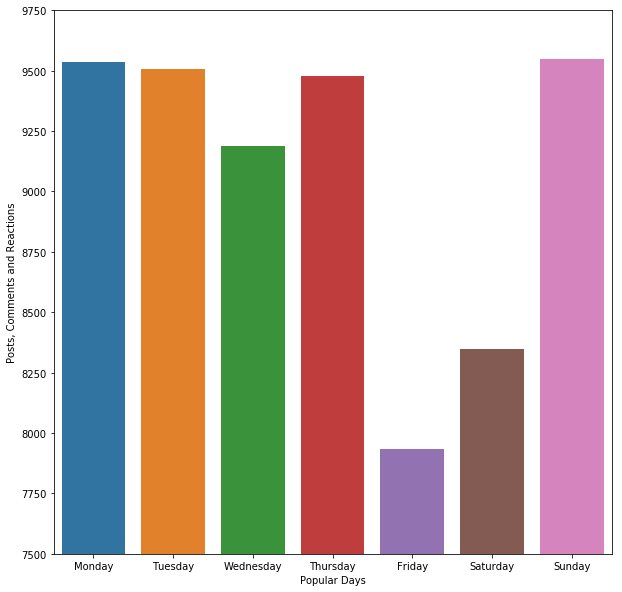

In [94]:
# Set size of plot
f, ax = plt.subplots(figsize=(10, 10))

# Set range of y-axis to make the comparison easier.
plt.ylim(7500, 9750)
sns.barplot(x='Popular Days', y='Posts, Comments and Reactions', data=pd_popular_days, ax=ax)

The **best days** to post are **Sunday**, **Monday**, **Tuesday**, and **Thursday**.

We can see here that the *worst days* to post are *Friday* and *Saturday*.

Now which times should we post?

#### Engagement for each time
It seems like each time is a column. Let's transform this a bit so we can plot this better.

In [43]:
alt_popular_times = pd.DataFrame(columns=["Days", "Times", "Count"], )

times = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM',
'1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']

for index, row in pd_popular_times.iterrows():
    for time in times:
        alt_popular_times = alt_popular_times.append({"Days": row["Popular Times"], "Times": time, "Count": row[time]}, ignore_index=True) 
    
alt_popular_times.head()

,Days,Times,Count
0,Monday,12 AM,374
1,Monday,1 AM,227
2,Monday,2 AM,160
3,Monday,3 AM,83
4,Monday,4 AM,68


That looks about right. Let's plot it and see what we get!

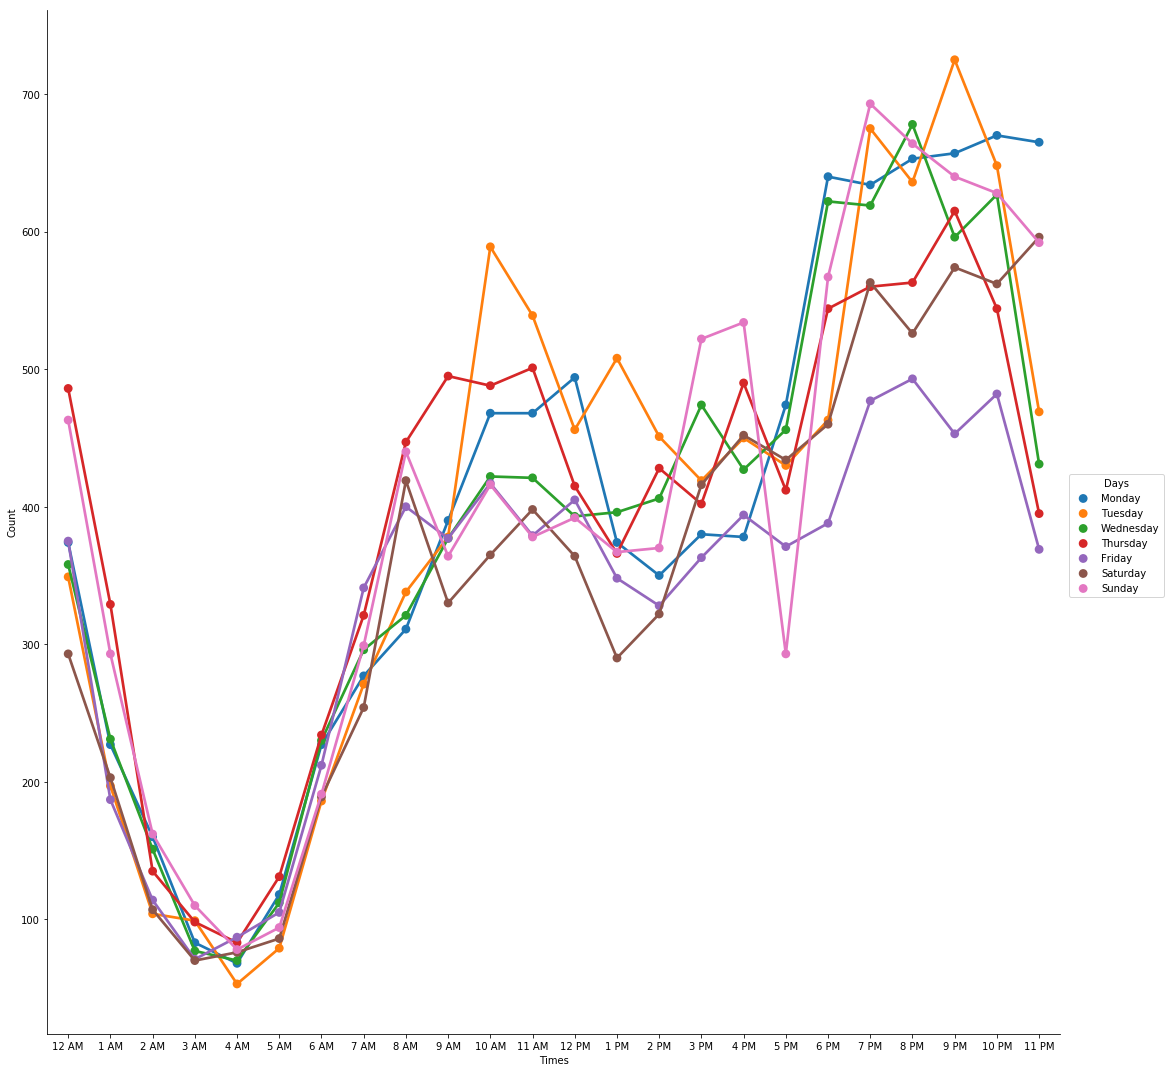

In [52]:
sns.factorplot(x="Times", y="Count", hue="Days", size=15, data=alt_popular_times)

From what we see here, the *best times to post* are from **7 PM - 9 PM**.

People start getting out at 10 PM with the steepest point at 4 AM.

### Who are the most popular members?
This is a tough question to answer because it depends on a number of factors.

For now, let's see which authors have the most top posts.

#### Top 5 members with the most popular posts

In [59]:
pd_popular_posts['Member'].value_counts()[0:5]

CJ Felix                      8
Bebs Lomarda                  3
Eriole Zephyr Vermillion      3
Kendra Sulon                  2
Johnlouie Pagapular Berora    2
Name: Member, dtype: int64

From the data, the guy with the most number of popular posts is [CJ Felix](https://www.facebook.com/XianKaylle) by a (relatively) huge margin.

Good for you sir!

[![CJ Felix](https://scontent.fmnl9-1.fna.fbcdn.net/v/t1.0-9/26165614_10214467781265324_6571617449003670736_n.jpg?_nc_cat=0&oh=1c98c532c273619225e7705aede87e22&oe=5B6723EA)](https://www.facebook.com/XianKaylle)

The next question that I have is, why are his posts popular? How does he do it?

Usually, the answer almost always falls on the content of the post. So let's check them out.

### CJ Felix's popular posts

In [67]:
cj_posts = pd_popular_posts[pd_popular_posts['Member'] == 'CJ Felix']
cj_posts = cj_posts.sort_values('Views', ascending=False)
cj_posts

,Top Posts,Member,Comments,Reactions,Views,Link
11,Sharing about real world part 2,CJ Felix,345,476,21344,https://www.facebook.com/groups/ProgramersDeve...
27,Padaan lang po mga ka PD\nIntroduction to Asp....,CJ Felix,152,578,17186,https://www.facebook.com/groups/ProgramersDeve...
10,Panu gumaling sa isang bagay? Part 2,CJ Felix,366,437,14254,https://www.facebook.com/groups/ProgramersDeve...
55,Simple motivational mga ka PD,CJ Felix,97,433,13194,https://www.facebook.com/groups/ProgramersDeve...
53,PTPA:\n\nBasic C# OOP Concept \nNOTE: Source C...,CJ Felix,93,464,12620,https://www.facebook.com/groups/ProgramersDeve...
29,Panu nga ba gumaling sa isang bagay?,CJ Felix,190,306,11944,https://www.facebook.com/groups/ProgramersDeve...
65,Simpleng motivational part 2,CJ Felix,101,352,11137,https://www.facebook.com/groups/ProgramersDeve...
80,Advice lang muna :),CJ Felix,109,199,10561,https://www.facebook.com/groups/ProgramersDeve...


Here are his 8 most popular posts. Look at those views! Damn. Let's dissect this a bit further.

Let's see the average length of his posts. We're gonna use the median so we won't be affected by the outliers.

In [77]:
cj_posts['Top Posts'].apply(lambda post: len(post)).median()

33.5

The average length of his posts are 33.5 characters. **CHARACTERS!!** TOO SHORT! How is that possible?

Let's see the link on his most popular post and find out!

In [81]:
cj_posts.loc[11, 'Link']

'https://www.facebook.com/groups/ProgramersDevelopers/permalink/1738520216210209/'

The [post](https://www.facebook.com/groups/ProgramersDevelopers/permalink/1738520216210209/) was apparently it was a live Ask Me Anything (AMA) session! That actually makes sense!

Here's a [link to the video](https://www.facebook.com/XianKaylle/videos/10215025370084696/?t=0) if you want to watch.

([<matplotlib.patches.Wedge at 0x7f68319d9780>,
 [Text(0.738892,0.814886,'Tutorials'),
  Text(-0.920087,0.602859,'AMA'),
  Text(0.171439,-1.08656,'Motivational')],
 [Text(0.403032,0.444483,'26.6%'),
  Text(-0.501866,0.328832,'28.4%'),
  Text(0.0935122,-0.592668,'45.0%')])

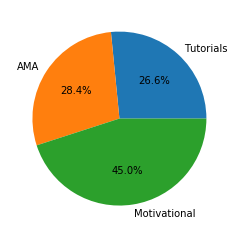

In [108]:
total_cj_views = cj_posts['Views'].sum()
cj_tutorials = sum([cj_posts['Views'].loc[i] for i in [27, 53]])
cj_ama = sum([cj_posts['Views'].loc[i] for i in [11, 80]])
cj_motiv = sum([cj_posts['Views'].loc[i] for i in [10, 55, 29, 65]])

from matplotlib.gridspec import GridSpec
the_grid = GridSpec(1, 1)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(x=[cj_tutorials, cj_ama, cj_motiv], labels=['Tutorials', 'AMA', 'Motivational'], autopct='%1.1f%%')

Let's print the rest of the links and check them out.

In [85]:
print("Links:")
for link in cj_posts['Link']:
    print(link)

Links:
https://www.facebook.com/groups/ProgramersDevelopers/permalink/1738520216210209/
https://www.facebook.com/groups/ProgramersDevelopers/permalink/1741568715905359/
https://www.facebook.com/groups/ProgramersDevelopers/permalink/1744188665643364/
https://www.facebook.com/groups/ProgramersDevelopers/permalink/1745263348869229/
https://www.facebook.com/groups/ProgramersDevelopers/permalink/1764592956936268/
https://www.facebook.com/groups/ProgramersDevelopers/permalink/1744172455644985/
https://www.facebook.com/groups/ProgramersDevelopers/permalink/1745285182200379/
https://www.facebook.com/groups/ProgramersDevelopers/permalink/1739404259455138/


Here are all the links -- check them all out if you want.

### After scanning through the videos and here's what I found:
1. His top posts are all **videos**;
2. They're all in **Filipino**;
3. Most of them **show his face**;
4. They're mostly **live videos**;
4. They fall in to these **categories**:
    1. **Tutorial**
    2. **Motivational**
    3. **Ask Me Anything**

Basically, the CJ Formula is:
__Create an AMA/Tutorial/Motivational live video with your face showing, in Filipino.__

### How about the other popular members?
Good question. Let's check it out.

In [98]:
other_members = pd_popular_posts[pd_popular_posts['Member'] != 'CJ Felix']
other_members = other_members.sort_values('Views', ascending=False)
other_members

,Top Posts,Member,Comments,Reactions,Views,Link
0,"Hello, I'm an IT System Support Analyst (TS).\...",Rn Santos,1323,1282,49725,https://www.facebook.com/groups/ProgramersDeve...
1,wala sana akong matatanggap na award pag hindi...,Jude Samuel Ato Torralba,525,4332,48831,https://www.facebook.com/groups/ProgramersDeve...
7,#OT May update dun sa teacher na nag dodrawing...,Eriole Zephyr Vermillion,33,2525,44112,https://www.facebook.com/groups/ProgramersDeve...
4,Hello mga ka-PD!!!\n\nBaka interested kayo? HA...,DA Luces,420,1144,42406,https://www.facebook.com/groups/ProgramersDeve...
8,"Share ko lang, nakita ko sa ibang group\nhttps...",Arcy Omilio Fabonan,269,1113,38502,https://www.facebook.com/groups/ProgramersDeve...
2,Share ko lang tutal bakasyon na :D for referen...,Santie Pelayo,578,1886,37379,https://www.facebook.com/groups/ProgramersDeve...
6,NaN,Joenel Fresnido Cardinal,92,2264,36623,https://www.facebook.com/groups/ProgramersDeve...
3,Proven na mas magaling talaga Android kesa Iph...,Martin Christian Guerrero,372,1694,36545,https://www.facebook.com/groups/ProgramersDeve...
22,Wala daw math. :p,Min Kyu,97,1006,35227,https://www.facebook.com/groups/ProgramersDeve...
5,Cause of DEATH:\nSemi-colon,Bebs Lomarda,111,2185,34320,https://www.facebook.com/groups/ProgramersDeve...
